<a href="https://colab.research.google.com/github/ksenz2001/ksenz2001/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЗАДАНИЕ**

В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss

import warnings
warnings.filterwarnings("ignore")

# EDA

In [105]:
#Создаю счётчик для результатов модели

results = pd.DataFrame(columns=['Действие','Accuracy','Zero one Loss'])

In [106]:
#Выгружаю данные 

data = pd.read_csv('flag.csv',  
                 names =["Name","Continent","Zone","Area","Population","Language","religion",
                         "Num_bar","Num_stripes","number_of_colours","red","green","blue","gold","white","black","orange",
                         "mainhue","have_circle","have_cross","Saltires","quarters","have_sun_stars","crescent",
                        "triangles","icon","animate","text","topleft","botright"])
data.head()

,Name,Continent,Zone,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,...,Saltires,quarters,have_sun_stars,crescent,triangles,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               194 non-null    object
 1   Continent          194 non-null    int64 
 2   Zone               194 non-null    int64 
 3   Area               194 non-null    int64 
 4   Population         194 non-null    int64 
 5   Language           194 non-null    int64 
 6   religion           194 non-null    int64 
 7   Num_bar            194 non-null    int64 
 8   Num_stripes        194 non-null    int64 
 9   number_of_colours  194 non-null    int64 
 10  red                194 non-null    int64 
 11  green              194 non-null    int64 
 12  blue               194 non-null    int64 
 13  gold               194 non-null    int64 
 14  white              194 non-null    int64 
 15  black              194 non-null    int64 
 16  orange             194 non-null    int64 
 1

In [5]:
data.shape

(194, 30)

In [6]:
data.describe()

,Continent,Zone,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,red,...,have_circle,have_cross,Saltires,quarters,have_sun_stars,crescent,triangles,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Проверяю данные на пропуски

data.isna().sum()

Name                 0
Continent            0
Zone                 0
Area                 0
Population           0
Language             0
religion             0
Num_bar              0
Num_stripes          0
number_of_colours    0
red                  0
green                0
blue                 0
gold                 0
white                0
black                0
orange               0
mainhue              0
have_circle          0
have_cross           0
Saltires             0
quarters             0
have_sun_stars       0
crescent             0
triangles            0
icon                 0
animate              0
text                 0
topleft              0
botright             0
dtype: int64

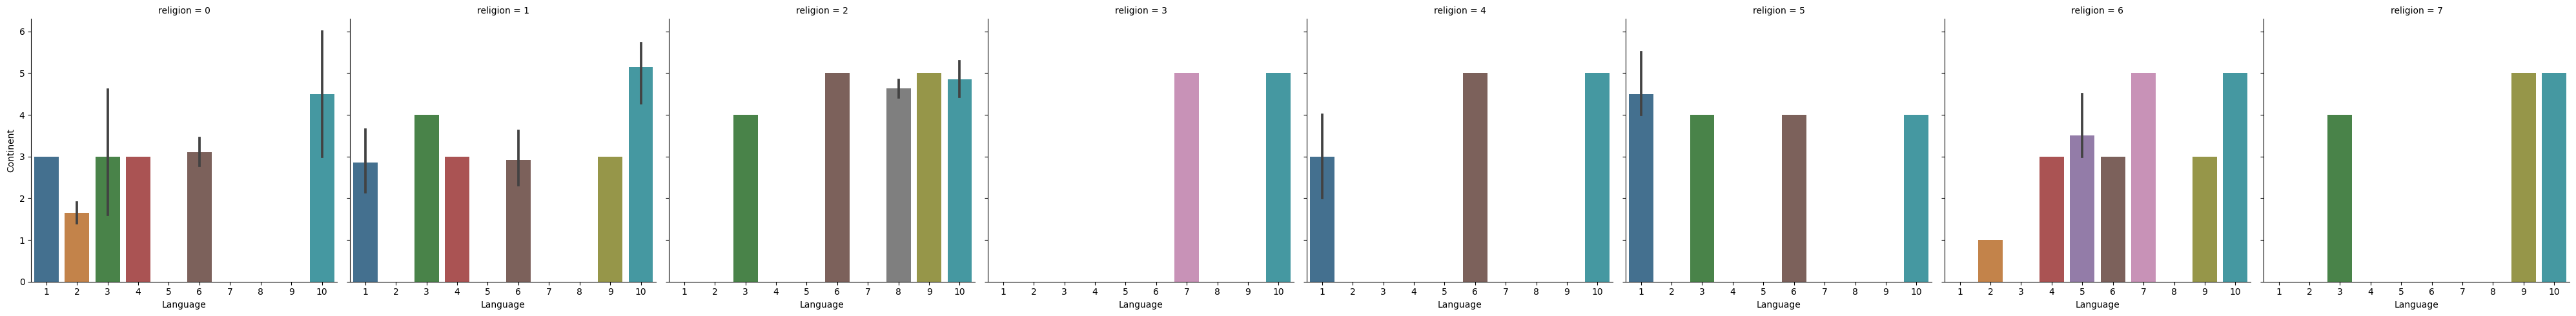

In [8]:
#Гистограммы сравнительного распределения религий по языкам/континентам. Позволяет судить о распространённости той или иной религии географически и межнационально. 

sns.catplot(data = data,y='Continent',x='Language',col='religion',
            kind='bar', saturation=0.5)

<Axes: xlabel='Language', ylabel='Density'>

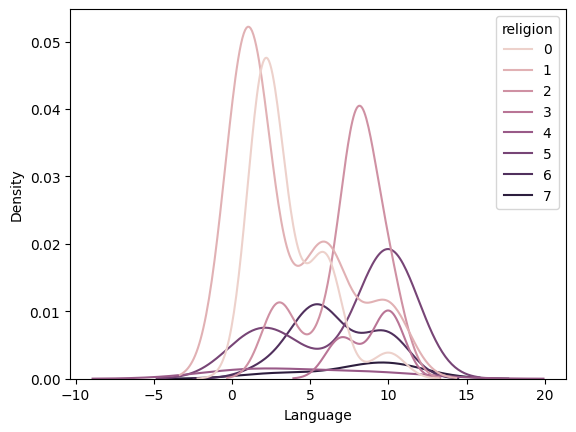

In [9]:
#Плотность распределения религий среди носителей языков, показывает уровень межнациональной распространённости той или иной религии. 

sns.kdeplot(data=data, x='Language', hue='religion')

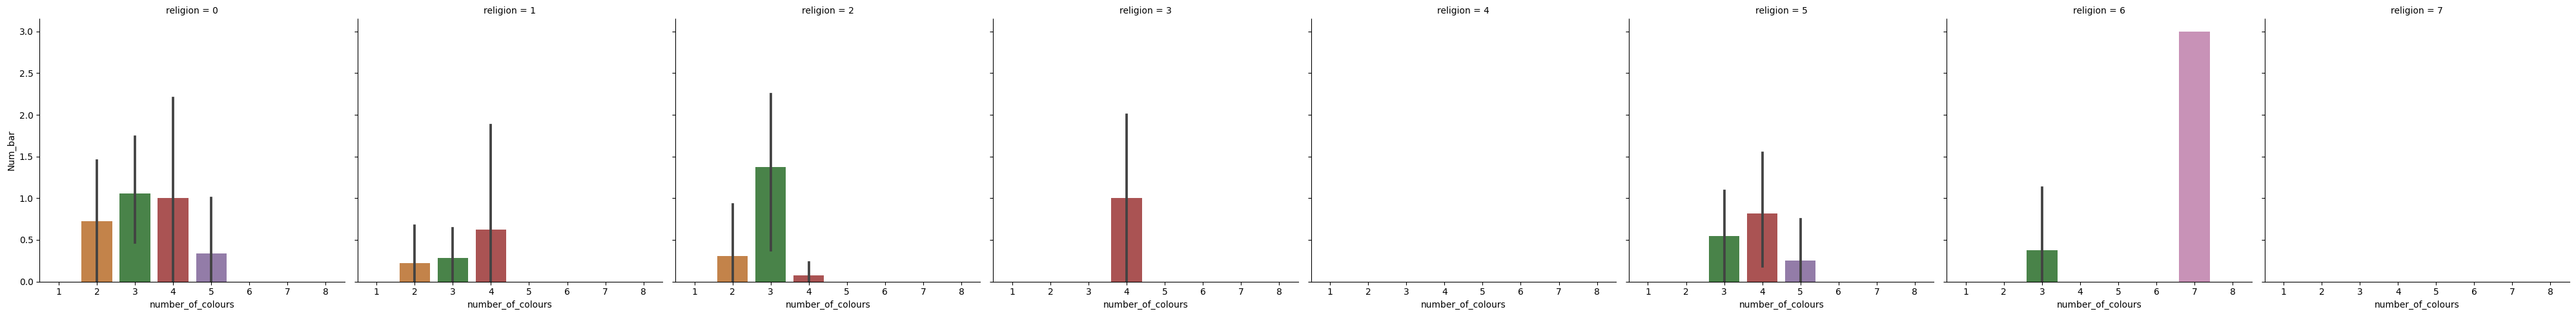

In [11]:
#Гистограммы зависимости наличия/количества полосок и цветов на флагах стран с определённым типом религии.  

sns.catplot(data = data,y='Num_bar',x='number_of_colours',col='religion',
            kind='bar', saturation=0.5)

Text(0.5, 1.0, 'Распределение флагов по религиям')

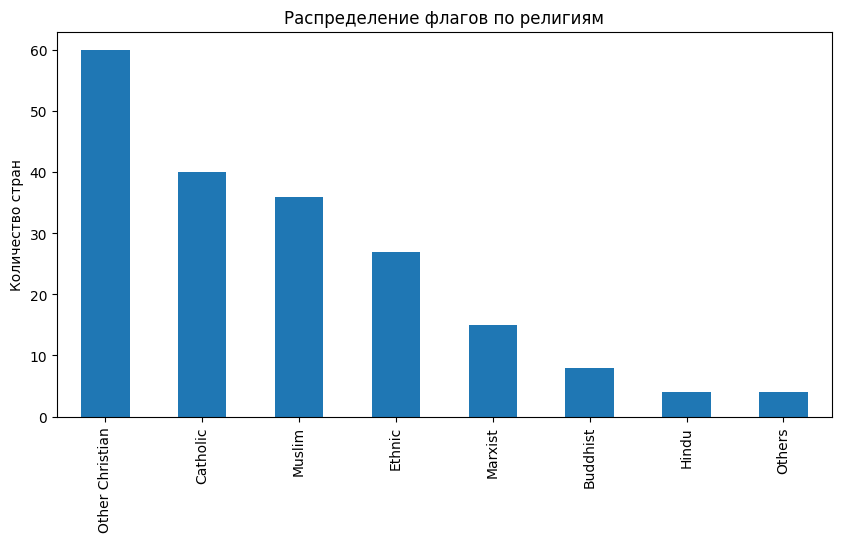

In [13]:
#Распределение количества флагов по религиям.

religion_dic = { 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"}
religion_data =data['religion']
religion_data = religion_data.map(religion_dic)
religions = religion_data.value_counts()

fig = plt.figure(figsize=(10,5))  

religions.plot(kind='bar')
plt.ylabel("Количество стран")
plt.title("Распределение флагов по религиям")

# Модель классификации без обработки

In [107]:
#Формирую датафрейм для моделирования и кодирую нечисловые значения

selectedColumns = data[["Name","Continent","Zone","Area","Population","Language", 
                         "Num_bar","Num_stripes","number_of_colours","red","green","blue","gold","white","black","orange",
                         "mainhue","have_circle","have_cross","Saltires","quarters","have_sun_stars","crescent",
                        "triangles","icon","animate","text","topleft","botright"]]

X = pd.get_dummies(selectedColumns, columns=['Name', 'mainhue', 'topleft', 'botright'])
X.head()

,Continent,Zone,Area,Population,Language,Num_bar,Num_stripes,number_of_colours,red,green,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,5,1,648,16,10,0,3,5,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3,1,29,3,6,0,0,3,1,0,...,1,0,0,0,0,0,0,0,1,0
2,4,1,2388,20,8,2,0,3,1,1,...,0,0,0,0,0,0,0,0,0,1
3,6,3,0,0,1,0,0,5,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3,1,0,0,6,3,0,3,1,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
X.shape

(194, 242)

In [109]:
y = pd.Series(data['religion'])
y.head()

0    2
1    6
2    2
3    1
4    0
Name: religion, dtype: int64

In [110]:
#Делю выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape

(194, 242)

In [111]:
#Обучаю модель логистической регрессии

model=LogisticRegression()

In [112]:
#Предсказание целевой переменной для тестового множества.

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(predictions)

[1 2 2 2 2 1 2 1 0 1 0 2 0 0 2 2 5 2 2 2 1 2 1 2 1 2 1 2 1 2 2 1 1 2 1 2 1
 7 1]


In [113]:
#Метрики модели metrics.classification_report.

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.64      0.56      0.60        16
           2       0.11      0.50      0.17         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0

    accuracy                           0.33        39
   macro avg       0.16      0.18      0.15        39
weighted avg       0.34      0.33      0.32        39



In [114]:
#Рассчитываю параметры accuracy и zero one loss score и записываю в счётчик.

zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results.loc[len(results)] = ['Модель default', acu, zero]

Accuracy = 0.3333333333333333
Zero one loss = 0.6666666666666667


In [22]:
#Строю корреляционную матрицу. 
data.corr()

,Continent,Zone,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,red,...,have_circle,have_cross,Saltires,quarters,have_sun_stars,crescent,triangles,icon,animate,text
Continent,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,...,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743
Zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,...,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602
Area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,...,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423
Population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,...,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194
Language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,...,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,...,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158
Num_bar,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,...,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
Num_stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,...,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
number_of_colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,...,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,...,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507


<Axes: >

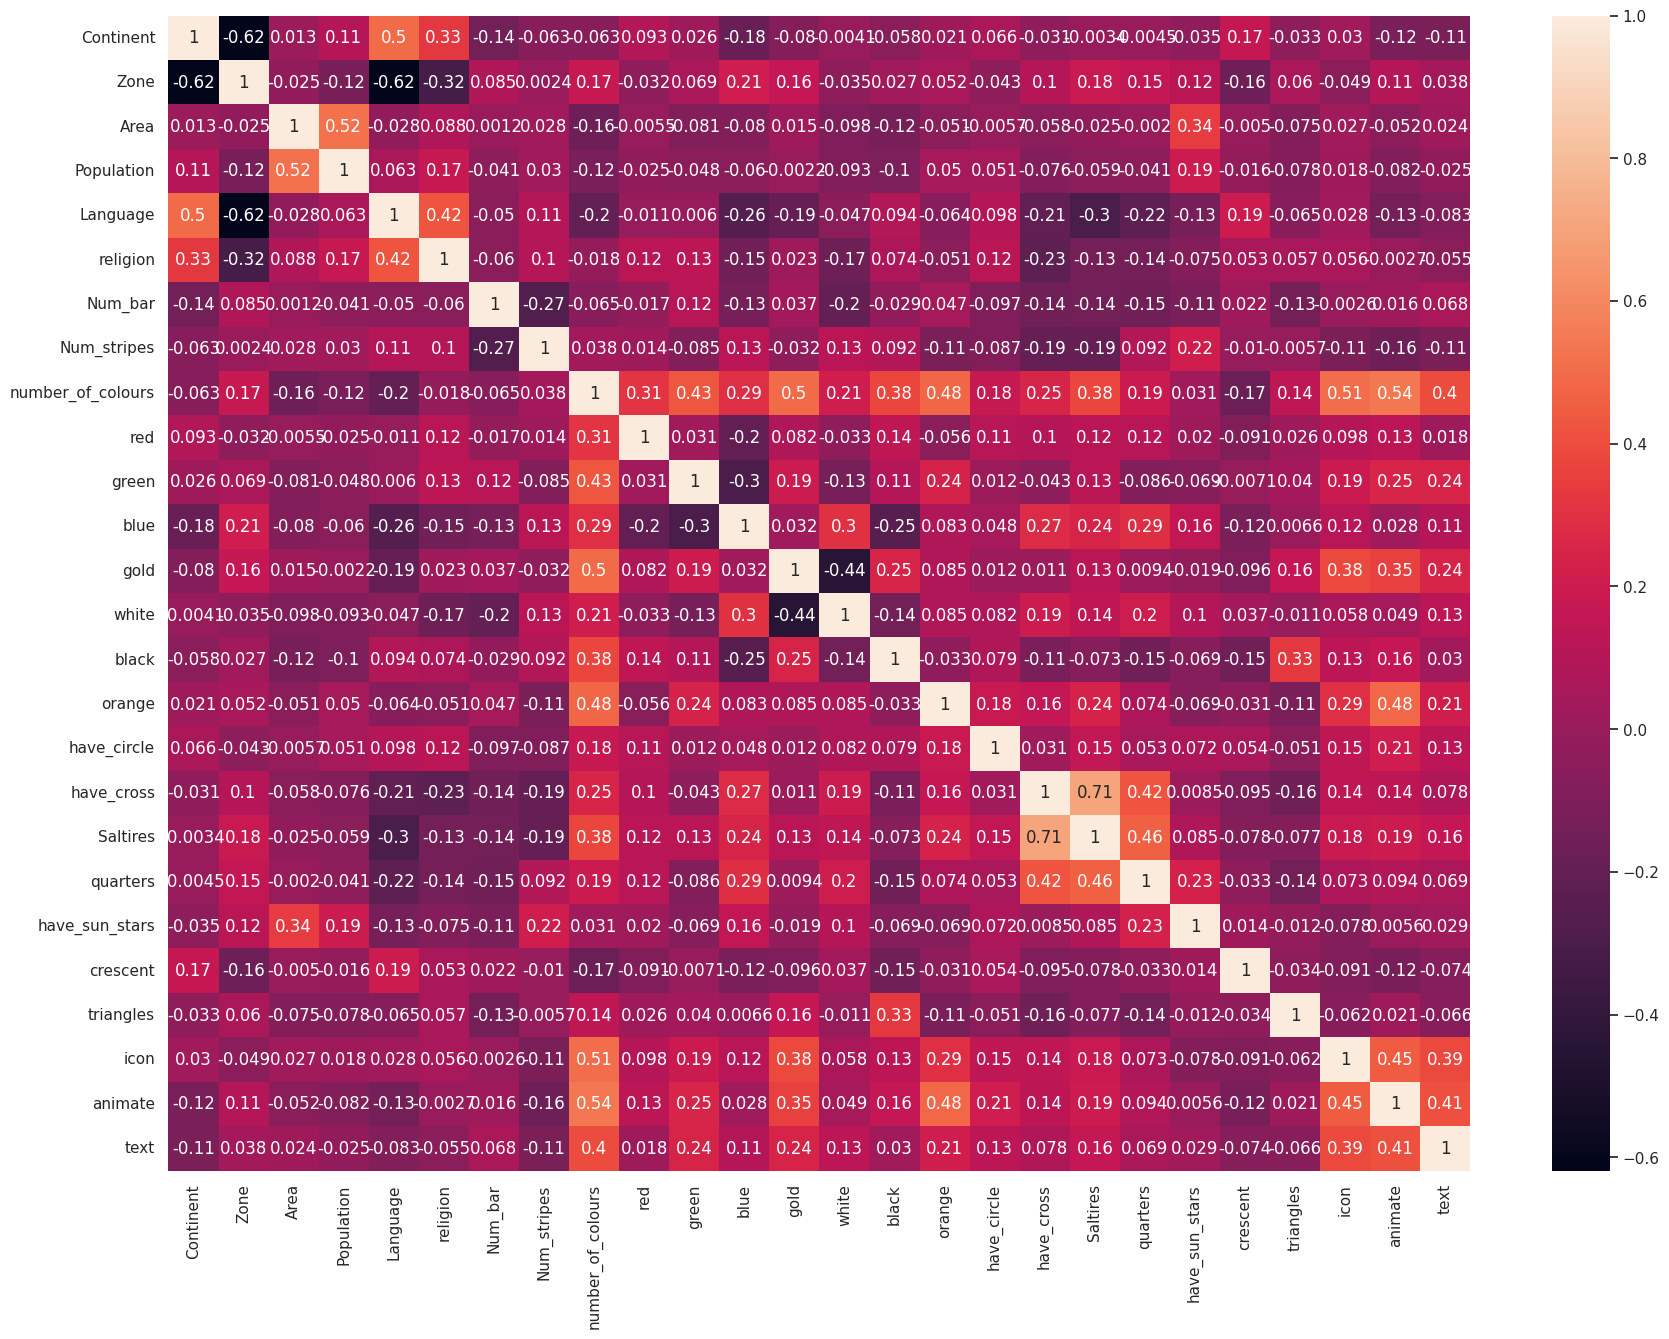

In [23]:
#Выводы по матрице корреляции:

#обращаю внимание на связи только сильнее 0,6
#Zone сильно связана с Continent и Language - в силу размытости признака Зона, следует удалить его
#Saltires сильно связан с have_cross - признак Андреевского креста более спецфечен, удаляю его
#остальные признаки значительных связей не имеют, или имеют в сочетании цветов (золото/белый)


sns.set_theme()
fig, ax = plt.subplots(figsize=(21, 15))
sns.heatmap(data.corr(), annot=True)


# Обработка выбросов в данных

Text(0.5, 1.0, 'Целевой признак religion выбросы (boxplot)')

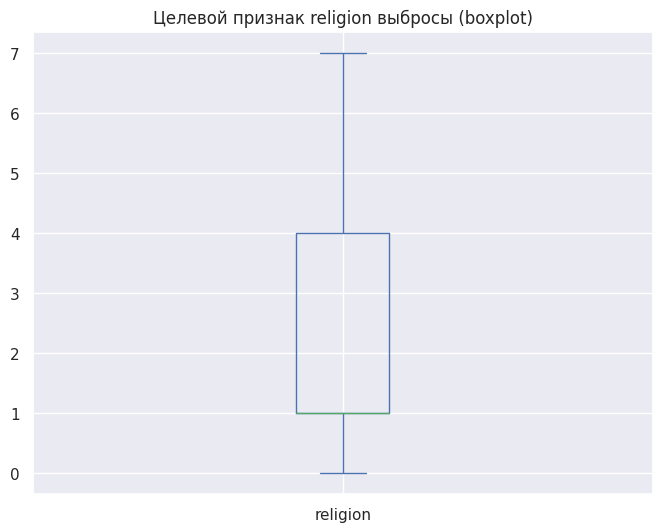

In [24]:
#Обрабатываю выбросы в данных.

data['religion'].plot.box(figsize=(8, 6))
plt.title('Целевой признак religion выбросы (boxplot)')

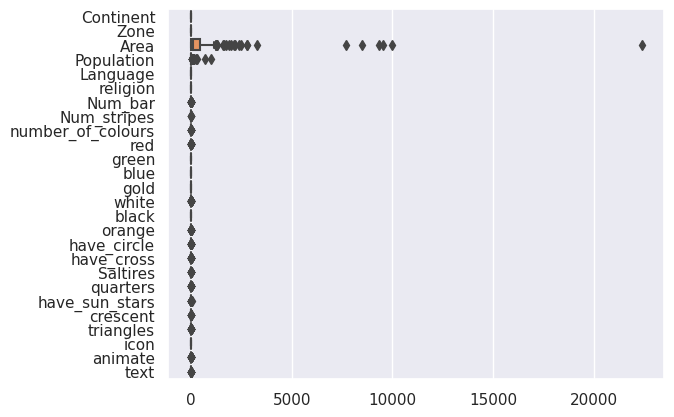

In [28]:
#Визуально выбросы наблюдаются только в признаках Area и Population

sns.boxplot(data = data, orient = "h")
plt.show()

<Axes: >

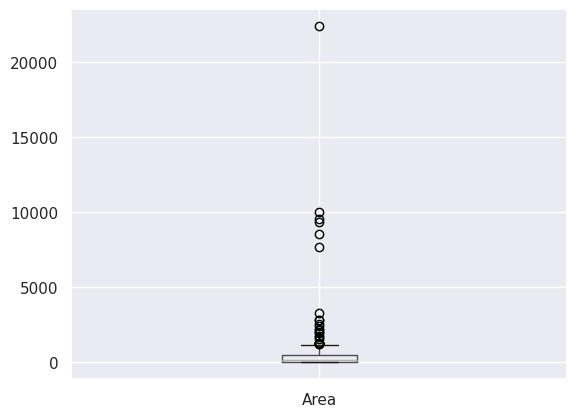

In [26]:
data.boxplot(column=['Area'])

<Axes: >

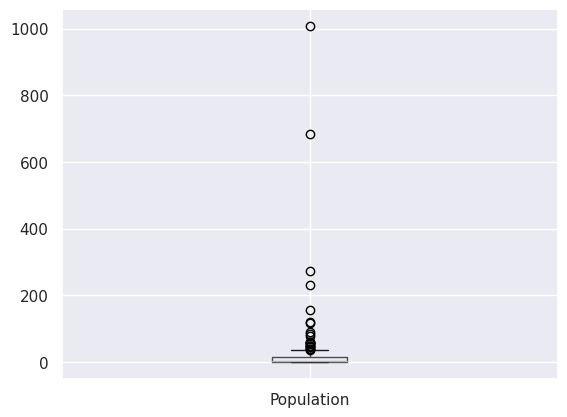

In [27]:
data.boxplot(column=['Population'])

In [115]:
#Для удаления выбросов создаю выборку только целочисленных признаков

selectedColumns2 = data[["Continent","Area","Population","Language", "religion", "Num_bar","Num_stripes","number_of_colours","red","green","blue","gold","white","black","orange", "have_circle","have_cross","quarters","have_sun_stars","crescent",
                        "triangles","icon","animate","text"]]

X2 = pd.DataFrame(selectedColumns2)
X2.head()


,Continent,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,red,green,...,orange,have_circle,have_cross,quarters,have_sun_stars,crescent,triangles,icon,animate,text
0,5,648,16,10,2,0,3,5,1,1,...,0,0,0,0,1,0,0,1,0,0
1,3,29,3,6,6,0,0,3,1,0,...,0,0,0,0,1,0,0,0,1,0
2,4,2388,20,8,2,2,0,3,1,1,...,0,0,0,0,1,1,0,0,0,0
3,6,0,0,1,1,0,0,5,1,0,...,1,0,0,0,0,0,1,1,1,0
4,3,0,0,6,0,3,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#Использую модель изолирующего леса.

iso = IsolationForest()
y_outliers = iso.fit_predict(X2)

In [117]:
#отбрасывание строк с выбросами

for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        X2.drop(i, inplace = True)


In [118]:
#Новая форма датафрейма.

X2.shape

(145, 24)

In [119]:
y_outliers

array([ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1])

In [120]:
np.count_nonzero(y_outliers == -1)

49

In [121]:
y2 = pd.Series(X2['religion'])
y2.head()

0    2
1    6
2    2
4    0
5    5
Name: religion, dtype: int64

# Нормализация признаков

In [122]:
#Нормализирую все признаки 

mms = MinMaxScaler()
mms.fit(X2)

X_scaled = pd.DataFrame(mms.transform(X2), columns=X2.columns)
X_scaled.head()


,Continent,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,red,green,...,orange,have_circle,have_cross,quarters,have_sun_stars,crescent,triangles,icon,animate,text
0,0.8,0.084265,0.101911,1.000000,0.285714,0.000000,0.272727,0.666667,1.0,1.0,...,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,1.0,0.0,0.0
1,0.4,0.003771,0.019108,0.555556,0.857143,0.000000,0.000000,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,1.0,0.0
2,0.6,0.310533,0.127389,0.777778,0.285714,0.666667,0.000000,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,0.066667,1.0,0.0,0.0,0.0,0.0
3,0.4,0.000000,0.000000,0.555556,0.000000,1.000000,0.000000,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.6,0.162159,0.044586,1.000000,0.714286,0.000000,0.181818,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,1.0,0.0,0.0


In [123]:
#Повторно обучаю модель на нормализированных признаках без выбросов. 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.2, random_state=42)

model=LogisticRegression()

In [124]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [125]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.75      0.75      0.75         8
           2       0.57      0.80      0.67         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.67      0.40      0.50         5
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         1

    accuracy                           0.66        29
   macro avg       0.41      0.49      0.44        29
weighted avg       0.57      0.66      0.60        29



In [126]:
#Рассчитываю параметры accuracy и zero one loss score и записываю в счётчик

zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results.loc[len(results)] = ['Нормализация MinMaxScaler', acu, zero]

Accuracy = 0.6551724137931034
Zero one loss = 0.3448275862068966


# Балансировка классов 

In [127]:
#Сбалансирую классы путем oversampling/undersampling.

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_scaled, y2)

In [128]:
#Повторно обучаю модель.

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model=LogisticRegression()

In [129]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [130]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.50      0.25      0.33         4
           2       0.71      0.83      0.77         6
           3       0.79      1.00      0.88        11
           4       0.85      1.00      0.92        11
           5       0.50      0.60      0.55         5
           6       0.75      0.43      0.55         7
           7       0.86      1.00      0.92         6

    accuracy                           0.80        64
   macro avg       0.74      0.74      0.72        64
weighted avg       0.80      0.80      0.78        64



In [131]:
#Рассчитываю параметры accuracy и zero one loss score и записываю в счётчик

zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results.loc[len(results)] = ['Балансирование классов RandomOverSampler', acu, zero]

Accuracy = 0.796875
Zero one loss = 0.203125


# Уменьшение размерности пространства признаков

In [132]:
#Уменьшаю размерность пространства признаков методом PCA.

from sklearn.decomposition import PCA

pca = PCA(n_components = 24, svd_solver='full')

In [133]:
#Повторно обучаю модель.

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model=LogisticRegression()

In [134]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.50      0.25      0.33         4
           2       0.71      0.83      0.77         6
           3       0.79      1.00      0.88        11
           4       0.85      1.00      0.92        11
           5       0.50      0.60      0.55         5
           6       0.75      0.43      0.55         7
           7       0.86      1.00      0.92         6

    accuracy                           0.80        64
   macro avg       0.74      0.74      0.72        64
weighted avg       0.80      0.80      0.78        64



In [135]:
#Рассчитываю параметры accuracy и zero one loss score и записываю в счётчик

zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results.loc[len(results)] = ['Уменьшение размерности PCA', acu, zero]

Accuracy = 0.796875
Zero one loss = 0.203125


# Отбор признаков

In [136]:
#Использую метод KNN для отбора признаков.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=10)
sfs = SequentialFeatureSelector(knn, n_features_to_select=5)
sfs.fit(X_scaled, y2)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=10),
                          n_features_to_select=5)

In [137]:
sfs.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False,  True])

In [138]:
sfs.transform(X_scaled).shape

(145, 5)

In [139]:
#Повторно обучаю модель.Количество выбранных признаков. (ПЯТЬ)

X_train, X_test, y_train, y_test = train_test_split(sfs.transform(X_scaled), y2, test_size=0.2, random_state=42)

model=LogisticRegression()

In [140]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.44      0.50      0.47         8
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.62      1.00      0.77         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.52        29
   macro avg       0.24      0.34      0.28        29
weighted avg       0.38      0.52      0.43        29



In [141]:
#Рассчитываю параметры accuracy и zero one loss score и записываю в счётчик

zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results.loc[len(results)] = ['Автоматический отбор признаков KNN 5', acu, zero]

Accuracy = 0.5172413793103449
Zero one loss = 0.48275862068965514


# Оптимизация параметров модели 

In [142]:
#Оптимизирую параметры модели.

from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(sfs.transform(X_scaled), y2, test_size=0.2, random_state=42)

model=LogisticRegression()

max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

In [143]:
random_gridCV = RandomizedSearchCV(model,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 42,
                                  )

In [144]:
random_gridCV.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5...
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'max_iter': range(100, 500),
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   random_state=42, scoring='accuracy', verbose=1)

In [145]:
#Нахожу лучшие параметры.

# Single best score achieved across all params (k)
print(random_gridCV.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(random_gridCV.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(random_gridCV.best_estimator_)

0.6036231884057971
{'warm_start': False, 'solver': 'liblinear', 'max_iter': 479, 'C': 0.49}
LogisticRegression(C=0.49, max_iter=479, solver='liblinear')


In [146]:
#Заново обучаю модель с оптимизированными параметрами.

model_opt=LogisticRegression(C=0.98, max_iter=199, solver='newton-cg', warm_start=True)

In [147]:
model_opt.fit(X_train, y_train)
predictions = model_opt.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.40      0.50      0.44         8
           2       0.50      0.20      0.29         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.62      1.00      0.77         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.52        29
   macro avg       0.26      0.34      0.28        29
weighted avg       0.40      0.52      0.43        29



In [148]:
#Рассчитываю параметры accuracy и zero one loss score и записываю в счётчик

zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results.loc[len(results)] = ['Оптимизация RandomizedSearchCV', acu, zero]

Accuracy = 0.5172413793103449
Zero one loss = 0.48275862068965514


# Стэкинг моделей

In [149]:
#Обучаю стекинг трех моделей, включая модель с оптимизированными параметрами.

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('dtc', DecisionTreeClassifier(random_state=42)), ('rfc', RandomForestClassifier(random_state=42))]

clf = StackingClassifier(estimators=estimators, final_estimator=model_opt)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [150]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       0.83      1.00      0.91         5
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.93        29
   macro avg       0.83      0.81      0.81        29
weighted avg       0.91      0.93      0.91        29



In [151]:
#Рассчитываю параметры accuracy и zero one loss score и записываю в счётчик

zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results.loc[len(results)] = ['Стэкинг трёх моделей', acu, zero]

Accuracy = 0.9310344827586207
Zero one loss = 0.06896551724137934


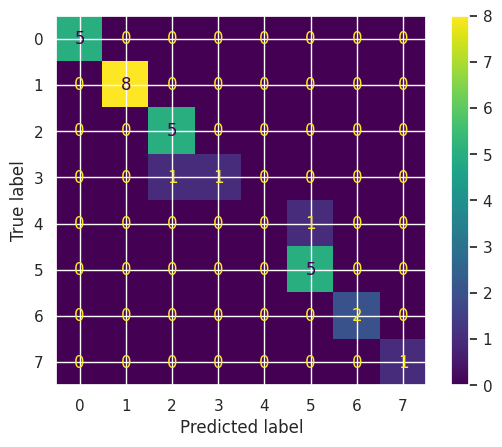

In [152]:
#Confusion Matrix.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
results (старые результаты - не трогать!)

,Действие,Accuracy,Zero one Loss
0,Модель default,0.333333,0.666667
1,Нормализация MinMaxScaler,0.435897,0.564103
2,Балансирование классов RandomOverSampler,0.166667,0.833333
3,Уменьшение размерности PCA,0.410256,0.589744
4,Автоматический отбор признаков KNN 5,0.358974,0.641026
5,Оптимизация RandomizedSearchCV,0.410256,0.589744
6,Стэкинг трёх моделей,0.538462,0.461538


In [153]:
results

,Действие,Accuracy,Zero one Loss
0,Модель default,0.333333,0.666667
1,Нормализация MinMaxScaler,0.655172,0.344828
2,Балансирование классов RandomOverSampler,0.796875,0.203125
3,Уменьшение размерности PCA,0.796875,0.203125
4,Автоматический отбор признаков KNN 5,0.517241,0.482759
5,Оптимизация RandomizedSearchCV,0.517241,0.482759
6,Стэкинг трёх моделей,0.931034,0.068966


# Творческий пункт

*Творческий пункт

Понимая, что в задании нам (видимо) было дано максимальное количество методов, я решила попробовать их сократить и немного изменить последовательность. Я убирала методы один за другим и всё становилось только лучше. В итоге я пришла к самой высокой метрике  max accurancy 0,948 не делая практически ничего... Я просто закодировала текстовые данные и сделала стэкинг - и всё. А если сразу использовать GradientBoostingClassifier вместо логистической регрессии, то можно выйти на 0,92 и без стэкинга.  


In [90]:
#Создаю счётчик для результатов модели

results1 = pd.DataFrame(columns=['Действие','Accuracy','Zero one Loss'])

In [91]:
#1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

df = pd.read_csv('flag.csv',  
                 names =["Name","Continent","Zone","Area","Population","Language","religion",
                         "Num_bar","Num_stripes","number_of_colours","red","green","blue","gold","white","black","orange",
                         "mainhue","have_circle","have_cross","Saltires","quarters","have_sun_stars","crescent",
                        "triangles","icon","animate","text","topleft","botright"])
df.head()

,Name,Continent,Zone,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,...,Saltires,quarters,have_sun_stars,crescent,triangles,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [92]:
#Формируем массивы для моделирования и кодируем нечисловые значения

selectedColumns = df[["Name","Continent","Area","Population","Language", "religion",
                         "Num_bar","Num_stripes","number_of_colours","red","green","blue","gold","white","black","orange",
                         "mainhue","have_circle","have_cross","quarters","have_sun_stars","crescent",
                         "triangles","icon","animate","text","topleft","botright"]]

X = pd.DataFrame(selectedColumns)
del X['religion']
X.head()

,Name,Continent,Area,Population,Language,Num_bar,Num_stripes,number_of_colours,red,green,...,have_cross,quarters,have_sun_stars,crescent,triangles,icon,animate,text,topleft,botright
0,Afghanistan,5,648,16,10,0,3,5,1,1,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,29,3,6,0,0,3,1,0,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,2388,20,8,2,0,3,1,1,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,0,0,1,0,0,5,1,0,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,0,0,6,3,0,3,1,0,...,0,0,0,0,0,0,0,0,blue,red


In [93]:
#кодируем нечисловые столбцы

X = pd.get_dummies(selectedColumns, columns=['Name', 'mainhue', 'topleft', 'botright'])
X.head()

,Continent,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,red,green,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,5,648,16,10,2,0,3,5,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3,29,3,6,6,0,0,3,1,0,...,1,0,0,0,0,0,0,0,1,0
2,4,2388,20,8,2,2,0,3,1,1,...,0,0,0,0,0,0,0,0,0,1
3,6,0,0,1,1,0,0,5,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0,0,6,0,3,0,3,1,0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
y = pd.Series(df['religion'])
y.head()

0    2
1    6
2    2
3    1
4    0
Name: religion, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LogisticRegression()

In [96]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.70      0.44      0.54        16
           2       0.17      1.00      0.29         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0

    accuracy                           0.33        39
   macro avg       0.19      0.23      0.17        39
weighted avg       0.39      0.33      0.31        39



In [97]:
zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results1.loc[len(results1)] = ['Модель default', acu, zero]

Accuracy = 0.3333333333333333
Zero one loss = 0.6666666666666667


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('dtc', DecisionTreeClassifier(random_state=42)), ('rfr', RandomForestClassifier(random_state=42))]

clf = StackingClassifier(estimators=estimators, final_estimator=model)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2
           5       0.75      1.00      0.86         6
           6       1.00      1.00      1.00         5

    accuracy                           0.95        39
   macro avg       0.82      0.86      0.84        39
weighted avg       0.91      0.95      0.93        39



In [101]:
zero = zero_one_loss(y_test, predictions)
acu = accuracy_score(y_test, predictions)

print(f'Accuracy = {acu}')
print(f'Zero one loss = {zero}')
results1.loc[len(results1)] = ['Стэкинг трёх моделей', acu, zero]

Accuracy = 0.9487179487179487
Zero one loss = 0.05128205128205132


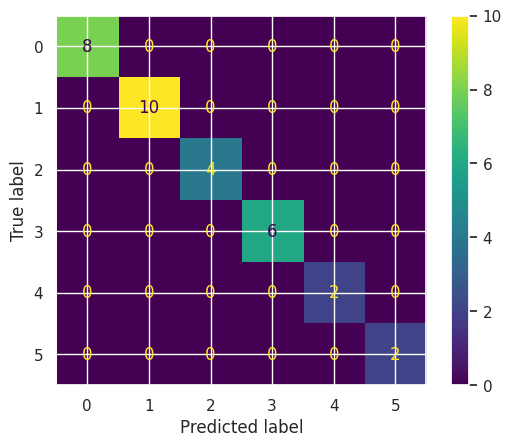

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, predictions)

cm1_display = ConfusionMatrixDisplay(cm).plot()

In [103]:
##Результаты сокращенной модели

results1

,Действие,Accuracy,Zero one Loss
0,Модель default,0.333333,0.666667
1,Стэкинг трёх моделей,0.948718,0.051282


In [154]:
##Результаты полной модели

results

,Действие,Accuracy,Zero one Loss
0,Модель default,0.333333,0.666667
1,Нормализация MinMaxScaler,0.655172,0.344828
2,Балансирование классов RandomOverSampler,0.796875,0.203125
3,Уменьшение размерности PCA,0.796875,0.203125
4,Автоматический отбор признаков KNN 5,0.517241,0.482759
5,Оптимизация RandomizedSearchCV,0.517241,0.482759
6,Стэкинг трёх моделей,0.931034,0.068966
